## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

#  fetch data
table_names_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(table_names_query, conn)
print("Tables in the database:", table_names)


Tables in the database:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [3]:
db = """ 
SELECT * FROM movie_basics
 """
db = pd.read_sql_query(db, conn)
db.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
cleaned_csv = """ 
SELECT * FROM movie_ratings
"""
df = pd.read_sql_query(df, conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [6]:
db.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [7]:
df.shape, db.shape

((73856, 3), (146144, 6))

In [8]:
joined_query = """
SELECT mb.*, mr.*
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
"""
joined_df = pd.read_sql_query(joined_query, conn)

joined_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [9]:
joined_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [10]:
joined_df.shape

(73856, 9)

In [11]:
#let's remove the rows with missing values
cleaned_df = joined_df.dropna(subset=['runtime_minutes', 'genres'])
cleaned_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

In [12]:
#import csv file
data_csv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_csv.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
data_csv.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [14]:
data_csv.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
#get rid of the rows with missing values
cleaned_csv = data_csv.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'])
cleaned_csv.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
cleaned_csv.shape

(2007, 5)

## EDA

In [17]:
 cleaned_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [18]:
#change format for numbers in numvotes
def format_number(num):
    return '{:.0f}'.format(num)

cleaned_df['numvotes'] = cleaned_df['numvotes'].apply(format_number)
cleaned_df.describe()

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\3403316322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes'] = cleaned_df['numvotes'].apply(format_number)


,start_year,runtime_minutes,averagerating
count,65720.000000,65720.000000,65720.000000
mean,2014.258065,94.732273,6.320902
std,2.600143,209.377017,1.458878
min,2010.000000,3.000000,1.000000
25%,2012.000000,81.000000,5.500000
50%,2014.000000,91.000000,6.500000
75%,2016.000000,104.000000,7.300000
max,2019.000000,51420.000000,10.000000


the Average movie runtime is 94.7 minutes. Let's try to compare the rating and the runtime of the movies.
the correlation between runtime and rating can be visualized using a scatter plot.

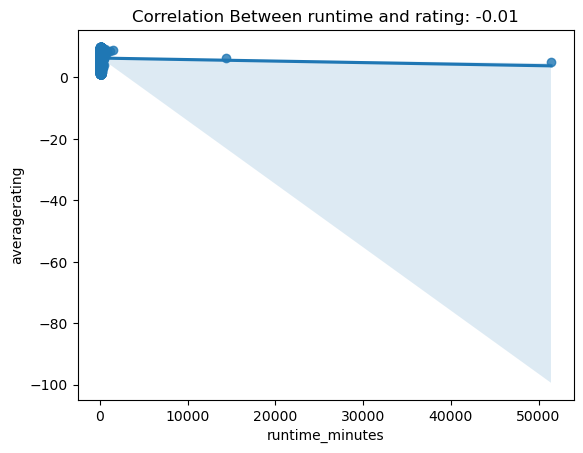

In [19]:
#checking the correlation between  runtime and rating
correlation = cleaned_df['runtime_minutes'].corr(cleaned_df['averagerating'])
sns.regplot(x='runtime_minutes', y='averagerating', data=cleaned_df)
plt.title('Correlation Between runtime and rating: {:.2f}'.format(correlation))
plt.show()

The correlation coefficient is -0.01, indicating a very weak negative correlation. This means that as the runtime increases, the average rating slightly decreases, but the relationship is almost negligible. In simpler terms, the length of runtime has almost no impact on the average rating. The data points are mostly clustered near the origin, with one outlier far along the horizontal axis, suggesting that most items have short runtimes and similar ratings, with very few exceptions.

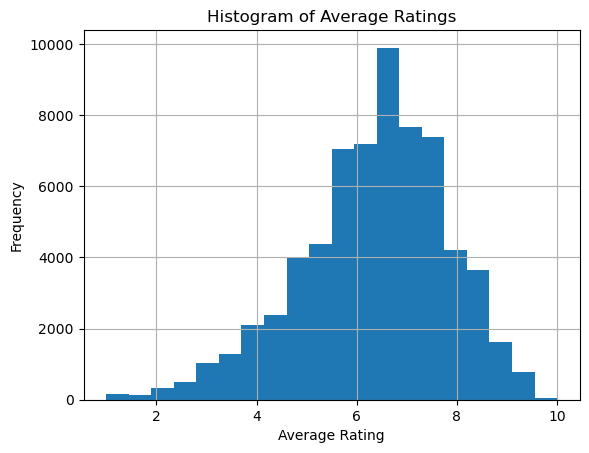

In [20]:
#let's plot a histogram for Ratings
cleaned_df['averagerating'].hist(bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings')
plt.show()

Most of the bars are concentrated around the center, indicating that most ratings fall within a middle range. This suggests that the data likely follows a normal distribution, meaning that the majority of ratings are average, with fewer ratings at the extreme low or high ends.

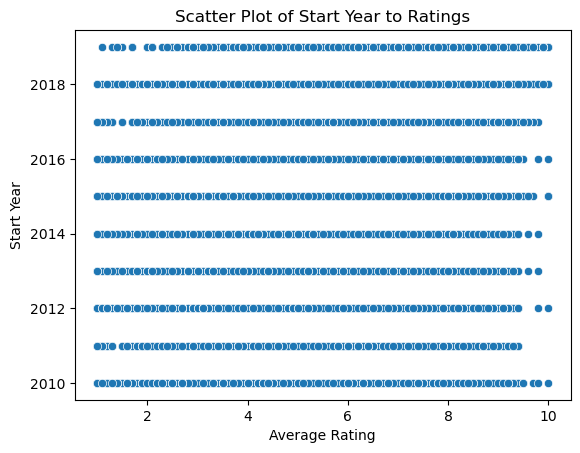

In [21]:
sns.scatterplot(x='averagerating', y='start_year', data=cleaned_df)
plt.title('Scatter Plot of Start Year to Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Start Year')
plt.show()

In [22]:
""" 
The start year doesn't affect the ratings of the movies.
"""

" \nThe start year doesn't affect the ratings of the movies.\n"

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   movie_id         65720 non-null  object 
 7   averagerating    65720 non-null  float64
 8   numvotes         65720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.0+ MB


I just noticed that numvotes is a string, let's convert it to integer.

In [24]:
# Convert numvotes column to float data type
cleaned_df['numvotes'] = cleaned_df['numvotes'].astype(float)


C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\1284639313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes'] = cleaned_df['numvotes'].astype(float)


In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   movie_id         65720 non-null  object 
 7   averagerating    65720 non-null  float64
 8   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.0+ MB


C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\2918696440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes_thousands'] = cleaned_df['numvotes'] / 1000


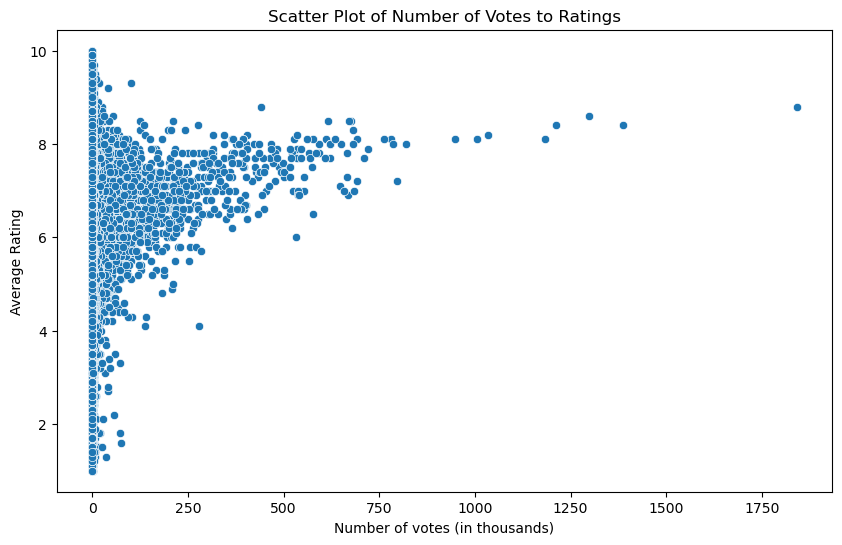

In [26]:
#first for clear reading
cleaned_df['numvotes_thousands'] = cleaned_df['numvotes'] / 1000
plt.figure(figsize=(10, 6))
# so does number of votes affect the ratings
sns.scatterplot(x='numvotes_thousands', y='averagerating', data=cleaned_df)
plt.title('Scatter Plot of Number of Votes to Ratings')
plt.xlabel('Number of votes (in thousands)')
plt.ylabel('Average Rating')
plt.show()

Dense Clustering Near Origin: Most items have a low number of votes and varying ratings. This suggests that many items are not widely rated, which is common in datasets where a few items are very popular, and many are less known.
Trend with Higher Votes: As the number of votes increases, the points spread out. There is a general trend where items with higher numbers of votes tend to have higher average ratings. This could indicate that more popular items are generally better received.
Variation Across Ratings: Even among items with high vote counts, there is a spread across the rating spectrum. This shows that while popularity (number of votes) can correlate with higher ratings, it is not a strict rule, and there are exceptions.
This analysis can help in understanding how the popularity of an item (measured by the number of votes) relates to its perceived quality (measured by average rating). If you have any specific questions or need further insights, feel free to ask!

In [28]:
#i haven't forgortten about our spreadsheet
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [29]:
#lets change foreign gross to float
cleaned_csv['foreign_gross'] = cleaned_csv['foreign_gross'].str.replace(',', '').astype(float)
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\1875055567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_csv['foreign_gross'] = cleaned_csv['foreign_gross'].str.replace(',', '').astype(float)


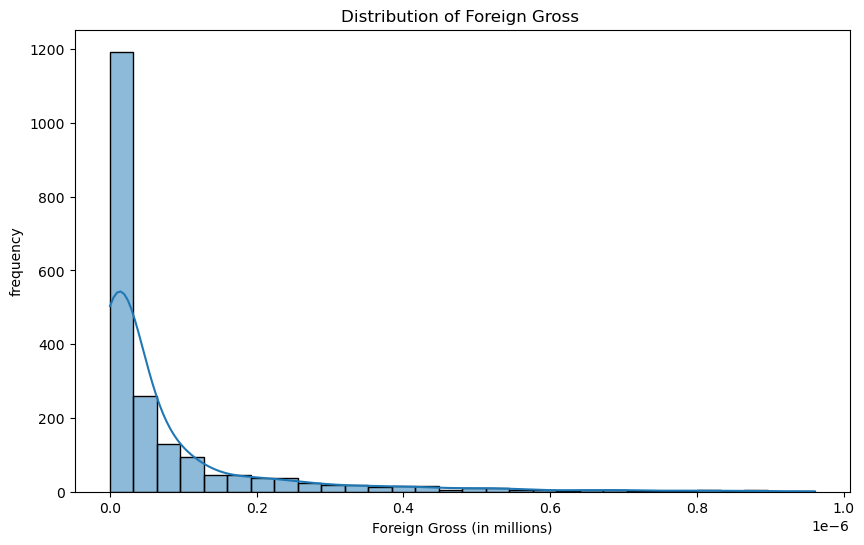

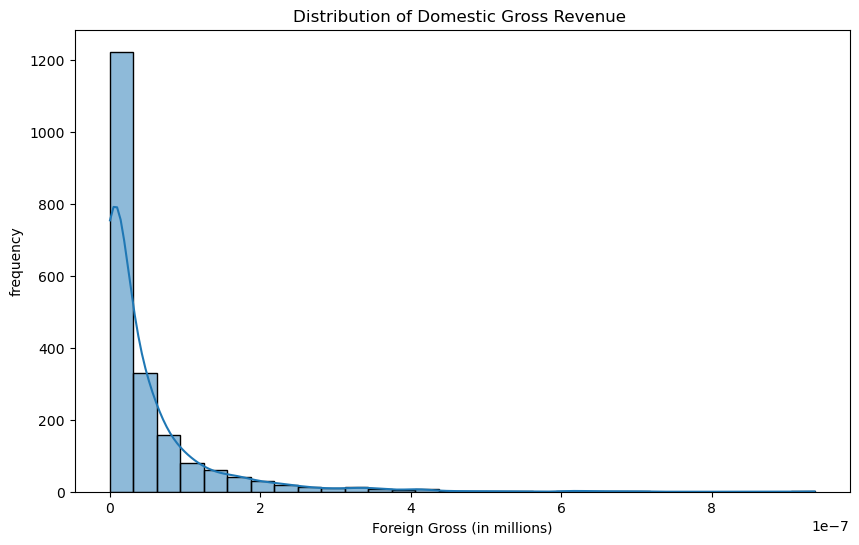

In [35]:
#Let's plot for revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_csv['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross ')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_csv['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross Revenue ')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('frequency')
plt.show()

High Frequency at Lower Revenues: Most movies earn lower  gross revenues.

Decreasing Frequency: As the gross revenue increases, the number of movies earning that amount decreases.

Right Skew: The histogram you provided seems to have a right skew, as the majority of the data (movies) are concentrated on the lower end of the  gross revenue scale, with a few movies earning significantly higher amounts12.

Implications: This skewness indicates that while most movies earn lower gross revenues, there are some outliers that earn much higher amounts, pulling the mean to the right.

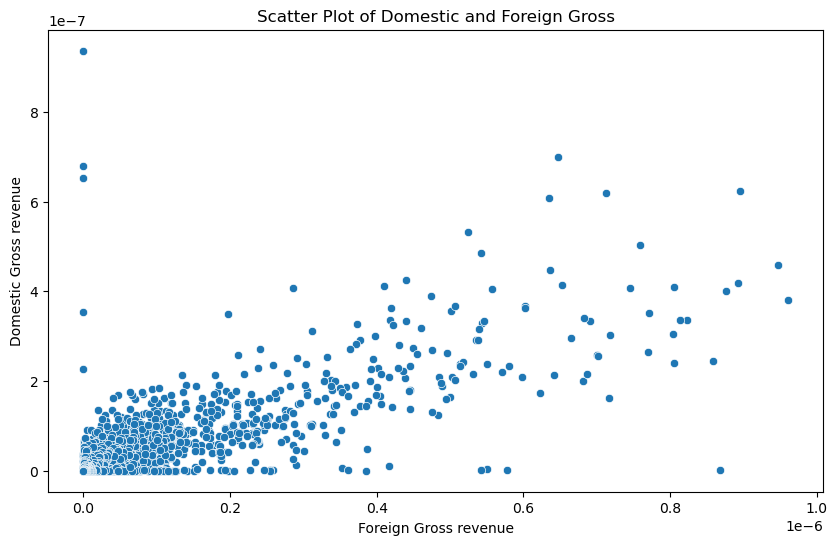

In [51]:
#scatterplot of foreign and domestic revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='foreign_gross', y='domestic_gross', data=cleaned_csv)
plt.title('Scatter Plot of Domestic and Foreign Gross')
plt.xlabel('Foreign Gross revenue')
plt.ylabel('Domestic Gross revenue')
plt.show()

Concentration of Data Points: Most data points are clustered towards the bottom left corner, indicating that many movies have lower domestic and foreign gross revenues.

Trend: There is a slight upward trend, suggesting that movies with higher foreign gross revenues tend to have higher domestic gross revenues as well.

Variability: The data points are widely dispersed, indicating significant variability in how domestic and foreign gross revenues relate.

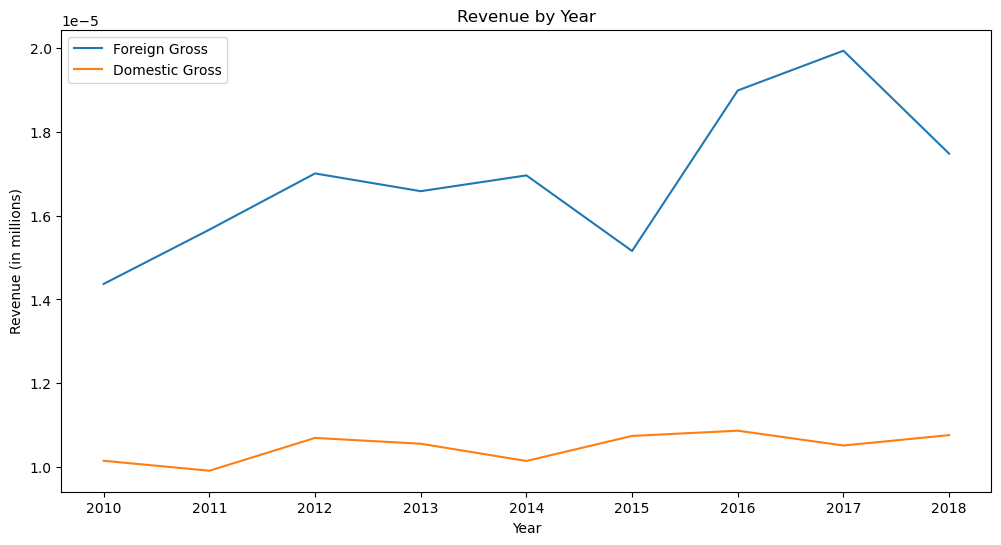

In [37]:
#we can see revenue by year
#Group by year 
revenue_by_year = cleaned_csv.groupby('year').sum().reset_index()
#let's plot

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='foreign_gross', data=revenue_by_year, label='Foreign Gross')
sns.lineplot(x='year', y='domestic_gross', data=revenue_by_year, label='Domestic Gross')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.show()

Foreign Gross (Blue Line): This line shows significant fluctuations. It peaks around 2014, dips, and then rises again, reaching its highest point in 2017. This indicates that foreign revenue experienced variability and overall growth during this period.

Domestic Gross (Orange Line): This line remains relatively flat, suggesting that domestic revenue stayed stable over the years without much change.

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\3631639705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_csv['total_gross'] = cleaned_csv['domestic_gross'] + cleaned_csv['foreign_gross']


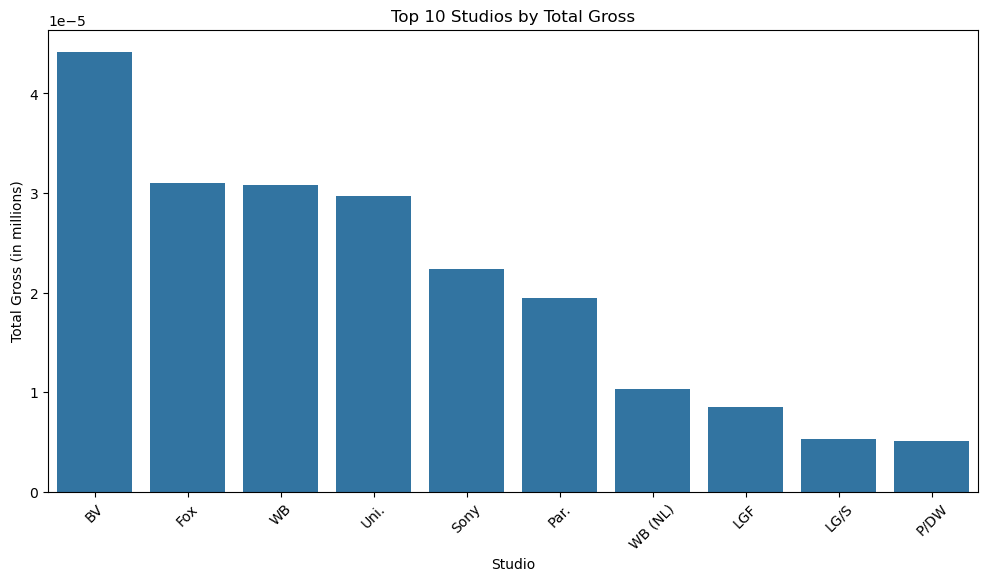

In [39]:
#for top studios let's combine foreign and gross revenue
cleaned_csv['total_gross'] = cleaned_csv['domestic_gross'] + cleaned_csv['foreign_gross']
#let's group by studio
top_studios = cleaned_csv.groupby('studio').sum().reset_index()
#wacha tu sort by total gross
top_studios = top_studios.sort_values('total_gross', ascending=False).head(10)

#let's plot
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='total_gross', data=top_studios)
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross (in millions)')
plt.xticks(rotation=45)
plt.show()

In [41]:
#how many studios were there?
len(cleaned_csv['studio'].unique())

172

there was 172 studios in the data. the top 10 studios had the highest total gross revenue. This means that films from these studios earned significantly more than films from other studios. 


In [64]:
#let's look at outliers
# Z-score method
cleaned_csv['Domestic_Z'] = (cleaned_csv['domestic_gross'] - cleaned_csv['domestic_gross'].mean()) / cleaned_csv['domestic_gross'].std()
cleaned_csv['Foreign_Z'] = (cleaned_csv['foreign_gross'] - cleaned_csv['foreign_gross'].mean()) / cleaned_csv['foreign_gross'].std()
outliers_z = cleaned_csv[(cleaned_csv['Domestic_Z'].abs() > 3) | (cleaned_csv['Foreign_Z'].abs() > 3)]
print("Outliers using Z-score method:\n", outliers_z)

Outliers using Z-score method:
                                             title studio  domestic_gross  \
0                                     Toy Story 3     BV    4.150000e-07   
1                      Alice in Wonderland (2010)     BV    3.342000e-07   
2     Harry Potter and the Deathly Hallows Part 1     WB    2.960000e-07   
3                                       Inception     WB    2.926000e-07   
4                             Shrek Forever After   P/DW    2.387000e-07   
...                                           ...    ...             ...   
3086                Mission: Impossible - Fallout   Par.    2.202000e-07   
3087                                   Deadpool 2    Fox    3.185000e-07   
3088  Fantastic Beasts: The Crimes of Grindelwald     WB    1.596000e-07   
3091                            Operation Red Sea  WGUSA    1.500000e-09   
3092                        Detective Chinatown 2     WB    2.000000e-09   

      foreign_gross  year   total_gross  Domestic_Z  Fo

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\1580503764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_csv['Domestic_Z'] = (cleaned_csv['domestic_gross'] - cleaned_csv['domestic_gross'].mean()) / cleaned_csv['domestic_gross'].std()
C:\Users\Marijoise\AppData\Local\Temp\ipykernel_8692\1580503764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_csv['Foreign_Z'] = (cleaned_csv['foreign_gross'] - cleaned_csv['foreign_gross'].mean()) / cleaned_csv['foreign_gross'].std()


In [65]:
# Remove the 'domestic_gross' and 'foreign_gross' columns
cleaned_csv = cleaned_csv.drop(columns=['Domestic_Z', 'Foreign_Z'])

# Display the updated DataFrame
cleaned_csv.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,4.150000e-07,6.520000e-07,2010,1.067000e-06
1,Alice in Wonderland (2010),BV,3.342000e-07,6.913000e-07,2010,1.025500e-06
2,Harry Potter and the Deathly Hallows Part 1,WB,2.960000e-07,6.643000e-07,2010,9.603000e-07
3,Inception,WB,2.926000e-07,5.357000e-07,2010,8.283000e-07
4,Shrek Forever After,P/DW,2.387000e-07,5.139000e-07,2010,7.526000e-07


In [66]:
cleaned_csv.tail()

,title,studio,domestic_gross,foreign_gross,year,total_gross
3275,I Still See You,LGF,1.400000e-12,1.500000e-09,2018,1.501400e-09
3286,The Catcher Was a Spy,IFC,7.250000e-10,2.290000e-10,2018,9.540000e-10
3309,Time Freak,Grindstone,1.000000e-11,2.560000e-10,2018,2.660000e-10
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,9.320000e-11,5.200000e-12,2018,9.840000e-11
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,4.320000e-11,3.000000e-11,2018,7.320000e-11


In [54]:
""" 
apparently z-score method is not going to help us. this is beacause I forgot to sample
"""

' \napparently z-score method is not going to help us. this is beacause I forgot to sample\n'

## LET' Now sample the data

In [67]:
#let's sample 100 rows
sample_csv = cleaned_csv.sample(n=100, random_state=42)
sample_csv.shape

(100, 6)

In [68]:
sample_csv.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
3211,The Children Act,A24,5.480000e-10,1.700000e-08,2018,1.754800e-08
558,The Last Circus,Magn.,4.050000e-11,3.200000e-09,2011,3.240500e-09
413,The Mechanic,CBS,2.910000e-08,4.700000e-08,2011,7.610000e-08
2001,Self/Less,Focus,1.230000e-08,1.820000e-08,2015,3.050000e-08
453,RA One,Eros,2.500000e-09,3.340000e-08,2011,3.590000e-08


In [77]:
#let's sample 100 rows for the database
sample_db = cleaned_df.sample(n=100, random_state=42)
sample_db.shape
sample_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 34680 to 12375
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            100 non-null    object 
 1   primary_title       100 non-null    object 
 2   original_title      100 non-null    object 
 3   start_year          100 non-null    int64  
 4   runtime_minutes     100 non-null    float64
 5   genres              100 non-null    object 
 6   movie_id            100 non-null    object 
 7   averagerating       100 non-null    float64
 8   numvotes            100 non-null    float64
 9   numvotes_thousands  100 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 8.6+ KB


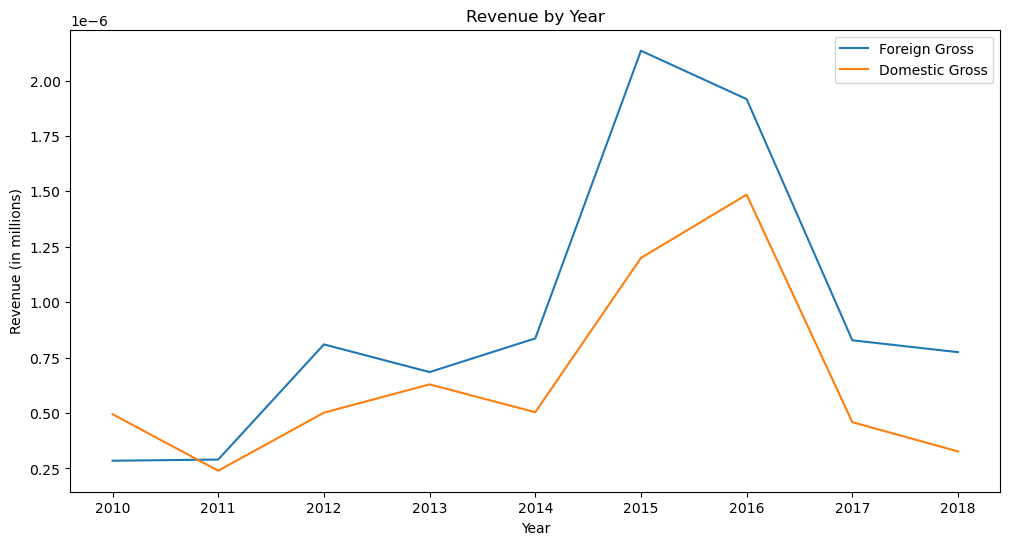

In [73]:
#let's now plot revenue by year of sampled data
revenue_by_year = sample_csv.groupby('year').sum().reset_index()
#let's plot

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='foreign_gross', data=revenue_by_year, label='Foreign Gross')
sns.lineplot(x='year', y='domestic_gross', data=revenue_by_year, label='Domestic Gross')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.show()

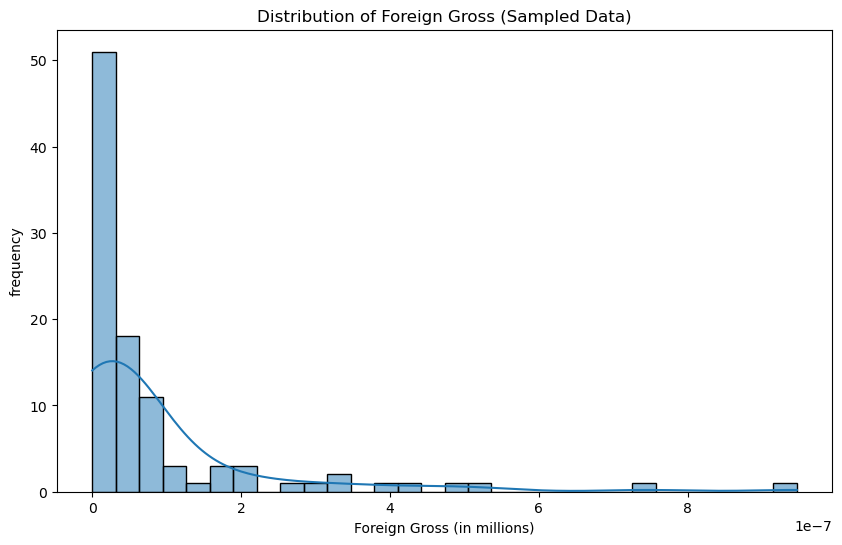

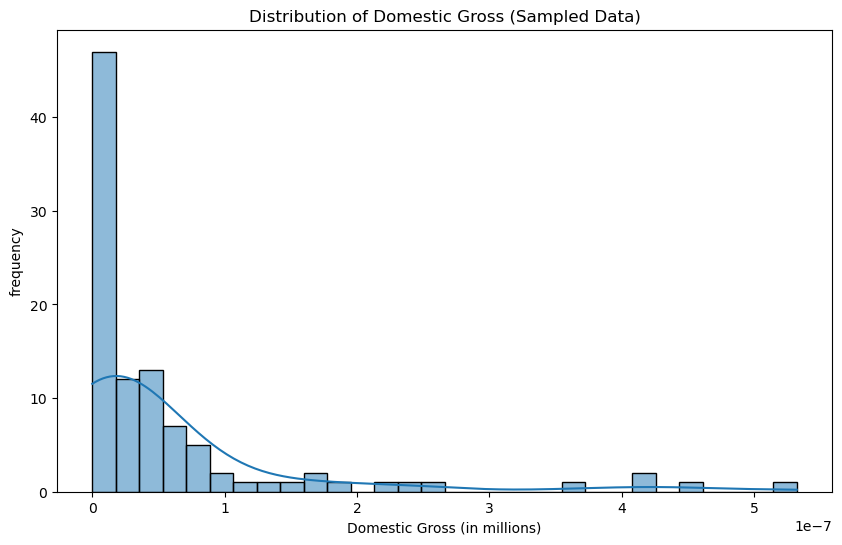

In [70]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(sample_csv['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross (Sampled Data)')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(sample_csv['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross (Sampled Data)')
plt.xlabel('Domestic Gross (in millions)')
plt.ylabel('frequency')
plt.show()


the distributions don't differ from the population distribution.

Text(0, 0.5, 'Domestic Gross revenue')

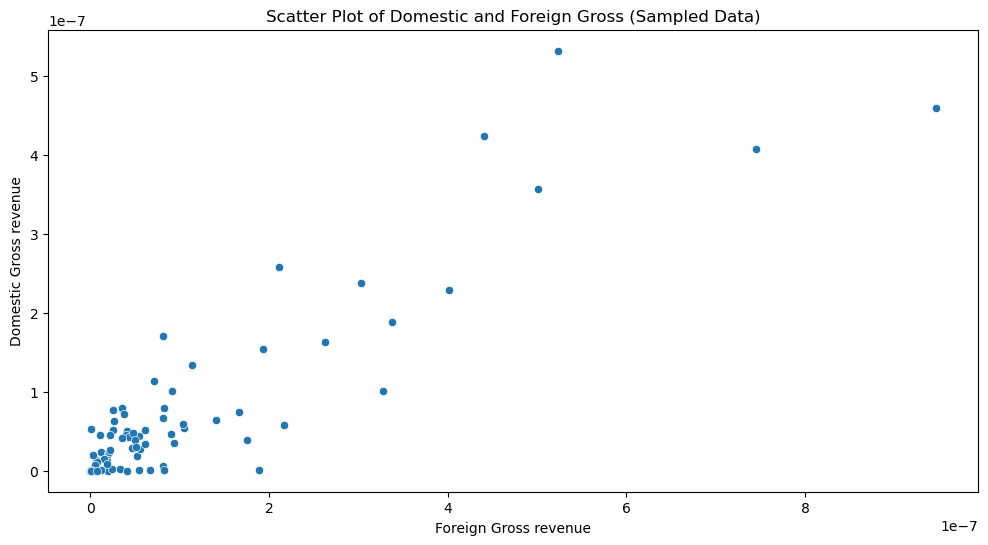

In [71]:
#let's now plot

plt.figure(figsize=(12, 6))
sns.scatterplot(x='foreign_gross', y='domestic_gross', data=sample_csv)
plt.title('Scatter Plot of Domestic and Foreign Gross (Sampled Data)')
plt.xlabel('Foreign Gross revenue')
plt.ylabel('Domestic Gross revenue')

# Diagnostic Analytics

In [72]:

sample_csv.describe()

,domestic_gross,foreign_gross,year,total_gross
count,1.000000e+02,1.000000e+02,100.000000,1.000000e+02
mean,5.838705e-08,8.558807e-08,2013.630000,1.439751e-07
std,1.034286e-07,1.550624e-07,2.592355,2.522309e-07
min,5.500000e-12,1.620000e-11,2010.000000,5.230000e-11
25%,3.967500e-10,3.675000e-09,2011.000000,6.857400e-09
50%,2.105000e-08,2.595000e-08,2014.000000,6.130000e-08
75%,5.840000e-08,8.222500e-08,2016.000000,1.398250e-07
max,5.322000e-07,9.464000e-07,2018.000000,1.405400e-06


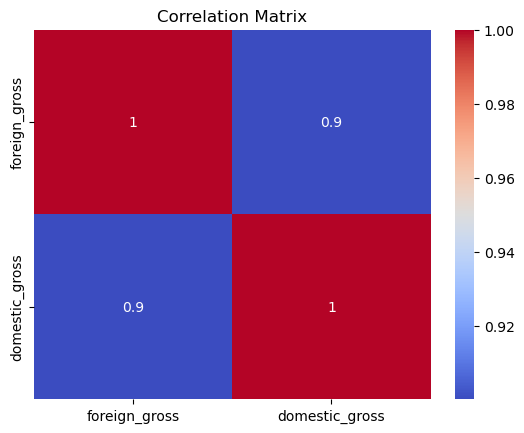

In [76]:
#correlation matrix
corr = sample_csv[['foreign_gross', 'domestic_gross']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Diagonal Values: The diagonal cells (from top-left to bottom-right) show a value of 1.00. This indicates a perfect positive correlation, which is expected since each variable is perfectly correlated with itself.
Off-Diagonal Values: The off-diagonal cells show a value of 0.9. This suggests a very high positive correlation between foreign_gross and domestic_gross. In simpler terms, when the gross earnings from foreign markets increase, the gross earnings from domestic markets also tend to increase, and vice versa.

In [78]:
#split genres and explode the dataframe
sample_db['genres'] = sample_db['genres'].str.split(',')
genres_explodes = sample_db.explode('genres')
#removing whitespaces
genres_explodes['genres'] = genres_explodes['genres'].str.strip()
#count occurences of each genre
genre_count = genres_explodes['genres'].value_counts().reset_index()
genre_count.columns = ['genre', 'count']
#plot top genres
top_g = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='count', data=genre_count[:top_g])
plt.title('Top {} Genres'.format(top_g))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


ValueError: DataFrame columns must be unique. Duplicate columns: ['movie_id']